# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress


import json
import csv
import os
from datetime import datetime, timedelta

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
## Create a list of cities for a set of random latitude and longtitude

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [4]:
# set up lists to hold reponse info
data_city_name       = []
data_city_latitude   = []
data_city_longitude  = []
data_max_temperature = []
data_humidity        = []
data_cloud_coverage  = []
data_wind_speed      = []
data_city_country    = []
data_city_datetime   = []

# Create the city counter and record set counter
city_ctr           = 0
set_ctr            = 1
city_processed_ctr = 0
city_skipped_ctr   = 0

# Build the base URL to request for weather data
url      = "http://api.openweathermap.org/data/2.5/weather?"
units    = "imperial"
url_base = f"{url}appid={weather_api_key}&units={units}&q="

print ("Beginning Data Retrieval")     
print ("-----------------------------")
for city in cities:

    # Assemble the url
    url_city = url_base + city
    
    # Retrieve the API data and format it into JSON 
    response = requests.get(url_city)
    
    # Save the data of each city
    response_json = response.json()
    
    try:
        
        # Pause for 60 seconds every 50 records processed
        if city_ctr > 49: 
            city_ctr = 0
            set_ctr +=1
            time.sleep(60) 
            
        data_city_name.append      (response_json['name']              )    
        data_city_latitude.append  (response_json['coord'] ['lat']     )
        data_city_longitude.append (response_json['coord'] ['lon']     )
        data_max_temperature.append(response_json['main']  ['temp_max'])
        data_humidity.append       (response_json['main']  ['humidity'])  
        data_cloud_coverage.append (response_json['clouds']['all']     )  
        data_wind_speed.append     (response_json['wind']  ['speed']   )
        data_city_country.append   (response_json['sys']   ['country'] )   
        data_city_datetime.append  (response_json['dt']                )
        
        print (f"Processing Record {city_ctr} of Set {set_ctr} | {city}")
        
         # Accumulate the processed counters
        city_ctr += 1
        city_processed_ctr += 1
        
    except (KeyError, IndexError):
        
        # Skip city without API data
        print (f"City {city} not found. Skipping...")
        city_skipped_ctr   += 1
        
print ("----------------------------- Data Retrieval Complete -----------------------------")       
print ("===================================================================================")        
print (f"Total number of cities processed: {city_processed_ctr}")
print (f"Total number of cities skipped  : {city_skipped_ctr}")
print ("===================================================================================")  

Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 1 | punta arenas
Processing Record 1 of Set 1 | harper
Processing Record 2 of Set 1 | presidencia roque saenz pena
City sentyabrskiy not found. Skipping...
Processing Record 3 of Set 1 | fortuna
Processing Record 4 of Set 1 | tuatapere
Processing Record 5 of Set 1 | bangarapet
Processing Record 6 of Set 1 | khatanga
Processing Record 7 of Set 1 | radom
City grand river south east not found. Skipping...
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | salalah
Processing Record 12 of Set 1 | karabulak
Processing Record 13 of Set 1 | san quintin
Processing Record 14 of Set 1 | bilma
City tumannyy not found. Skipping...
City barentsburg not found. Skipping...
City warqla not found. Skipping...
Processing Record 15 of Set 1 | kroya
Processing Record 16 of Set 1 | castro
Processing Record 17 of Set 1 | jam

Processing Record 24 of Set 4 | provideniya
Processing Record 25 of Set 4 | rabaul
Processing Record 26 of Set 4 | flinders
Processing Record 27 of Set 4 | bikin
Processing Record 28 of Set 4 | saldanha
City kamenskoye not found. Skipping...
Processing Record 29 of Set 4 | kruisfontein
Processing Record 30 of Set 4 | kavieng
Processing Record 31 of Set 4 | hambantota
Processing Record 32 of Set 4 | edson
Processing Record 33 of Set 4 | goure
Processing Record 34 of Set 4 | riohacha
Processing Record 35 of Set 4 | gaoual
Processing Record 36 of Set 4 | liverpool
Processing Record 37 of Set 4 | ulladulla
Processing Record 38 of Set 4 | shebunino
Processing Record 39 of Set 4 | manavalakurichi
Processing Record 40 of Set 4 | sola
Processing Record 41 of Set 4 | nova serrana
Processing Record 42 of Set 4 | codrington
Processing Record 43 of Set 4 | le pradet
Processing Record 44 of Set 4 | nanortalik
Processing Record 45 of Set 4 | tubigan
Processing Record 46 of Set 4 | itagiba
Processing

Processing Record 7 of Set 8 | suba
Processing Record 8 of Set 8 | sinnamary
Processing Record 9 of Set 8 | helena
City barbar not found. Skipping...
Processing Record 10 of Set 8 | kendallville
Processing Record 11 of Set 8 | berdigestyakh
Processing Record 12 of Set 8 | ostrovnoy
Processing Record 13 of Set 8 | sembakung
Processing Record 14 of Set 8 | tiarei
Processing Record 15 of Set 8 | pangnirtung
Processing Record 16 of Set 8 | charters towers
Processing Record 17 of Set 8 | kailua
Processing Record 18 of Set 8 | aracati
Processing Record 19 of Set 8 | buckeye
Processing Record 20 of Set 8 | ola
Processing Record 21 of Set 8 | grajau
Processing Record 22 of Set 8 | montepuez
Processing Record 23 of Set 8 | yuncheng
Processing Record 24 of Set 8 | saint-joseph
Processing Record 25 of Set 8 | marzuq
Processing Record 26 of Set 8 | southbridge
Processing Record 27 of Set 8 | price
City fianga not found. Skipping...
Processing Record 28 of Set 8 | chotila
Processing Record 29 of Se

Processing Record 36 of Set 11 | henties bay
Processing Record 37 of Set 11 | kolaras
Processing Record 38 of Set 11 | egvekinot
Processing Record 39 of Set 11 | muros
Processing Record 40 of Set 11 | pombia
Processing Record 41 of Set 11 | guerrero negro
Processing Record 42 of Set 11 | ober-ramstadt
Processing Record 43 of Set 11 | nieuw amsterdam
Processing Record 44 of Set 11 | vicuna
Processing Record 45 of Set 11 | praya
Processing Record 46 of Set 11 | synya
Processing Record 47 of Set 11 | comodoro rivadavia
Processing Record 48 of Set 11 | aitape
Processing Record 49 of Set 11 | camana
City azimur not found. Skipping...
City malwan not found. Skipping...
Processing Record 0 of Set 12 | lekoni
Processing Record 1 of Set 12 | sangmelima
Processing Record 2 of Set 12 | vilhena
Processing Record 3 of Set 12 | maceio
Processing Record 4 of Set 12 | namie
Processing Record 5 of Set 12 | walvis bay
Processing Record 6 of Set 12 | aykino
Processing Record 7 of Set 12 | calbuco
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Convert the data to DataFrame
city_df = pd.DataFrame({ "City"            : data_city_name
                       , "City latitude"   : data_city_latitude
                       , "City longitude"  : data_city_longitude
                       , "Max temperature" : data_max_temperature
                       , "Humidity"        : data_humidity
                       , "Cloud coverage"  : data_cloud_coverage
                       , "Wind speed"      : data_wind_speed
                       , "City country"    : data_city_country
                       , "City datetime"   : data_city_datetime
                       })

city_df.index.name = "City_ID"

#Export the city data into a .csv. 
output_data_file = "../output_data/cities.csv"
output_path      = os.path.join(output_data_file )
city_df.to_csv(output_path,index="False")

city_df

,City,City latitude,City longitude,Max temperature,Humidity,Cloud coverage,Wind speed,City country,City datetime
City_ID,,,,,,,,,
0,Punta Arenas,-53.1500,-70.9167,30.31,86,0,8.05,CL,1660208147
1,Harper,4.3750,-7.7169,76.62,78,100,7.20,LR,1660207956
2,Presidencia Roque Sáenz Peña,-26.7852,-60.4388,45.03,96,94,5.35,AR,1660208148
3,Fortuna,40.5982,-124.1573,61.99,66,100,0.00,US,1660208150
4,Tuatapere,-46.1333,167.6833,35.33,90,7,3.67,NZ,1660208151
...,...,...,...,...,...,...,...,...,...
554,Namie,37.4833,141.0000,86.54,76,43,1.01,JP,1660209349
555,Walvis Bay,-22.9575,14.5053,49.15,100,0,4.61,NA,1660209350
556,Aykino,62.2248,49.9922,71.26,34,12,10.00,RU,1660209351


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.
# Inspect the data and remove the cities where the humidity > 100%

# check if there area cities where humidity > 100%
count_cities_gt_100_humidities = len(city_df[(city_df["Humidity"] > 100) ])

if count_cities_gt_100_humidities  > 0:
    print (f"count_cities_gt_100_humidities: {count_cities_gt_100_humidities }")

# Remove the cities where the humidity > 100% 
clean_city_data = city_df.loc[ (city_df["Humidity"] <= 100 ) 
                                     , :]
len(clean_city_data)

559

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [8]:
# Inspect the data and remove the cities where the humidity > 100%

# check if there area cities where humidity > 100%
count_cities_gt_100_humidities = len(city_df[(city_df["Humidity"] > 100) ])

if count_cities_gt_100_humidities  > 0:
    print (f"count_cities_gt_100_humidities: {count_cities_gt_100_humidities }")

# Remove the cities where the humidity > 100% 
clean_city_data = city_df.loc[ (city_df["Humidity"] <= 100 ) 
                                     , :]
len(clean_city_data)

559

## Plotting the Data
* Use proper labelling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [9]:
# Define a function to create scatter plot for Latitude vs. a given y_axis
def create_scatter_plot(scatter_parms_dict):
    
    # Save the y_axis value
    y_axis  = scatter_parms_dict.get("y_axis")
    ylabel  = scatter_parms_dict.get("ylabel")
    unit    = scatter_parms_dict.get("unit")
    outfile = scatter_parms_dict.get("outfile")
    
    # Build a scatter plot for Latitude vs. a given y_axis
    x_axis = clean_city_data["City latitude"]
    
    plt.scatter ( x_axis
                , y_axis
                , marker="o"
                )

    # Incorporate the other graph properties
    xlabel = "Latitude"

    plt.title  (f"{xlabel} vs. {ylabel} ")
    plt.ylabel (f"{ylabel} {unit}")
    plt.xlabel (f"{xlabel}")
    plt.grid   (True)

    # Save the figure
    plt.savefig(f"../output_data/{outfile}")

    # Show plot
    plt.show()


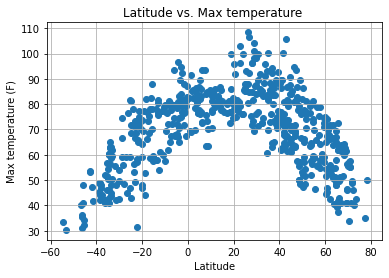

In [10]:
# Build a scatter plot for Latitude vs. Temperature

# Save the data to create the scatter plot in a dictionary
scatter_parms_dict =  { "y_axis"  : clean_city_data["Max temperature"]
                      , "ylabel"  : "Max temperature"
                      , "unit"    : "(F)"
                      , "outfile" : "fig01_Latitude_vs_Temperature.png"
}

# Call the function to create the scatter plot
create_scatter_plot(scatter_parms_dict )

## Latitude vs. Humidity Plot

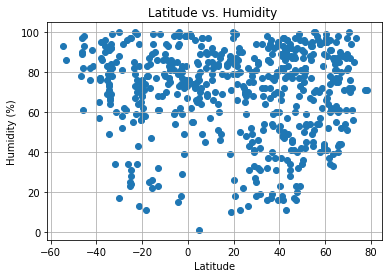

In [11]:
# Build a scatter plot for Latitude vs. Humidity 

# Save the data to create the scatter plot in a dictionary
scatter_parms_dict =  { "y_axis"  : clean_city_data["Humidity"]
                      , "ylabel"  : "Humidity"
                      , "unit"    : "(%)"
                      , "outfile" : "fig02_Latitude_vs_Humidity.png"
}

# Call the function to create the scatter plot
create_scatter_plot(scatter_parms_dict )

## Latitude vs. Cloudiness Plot

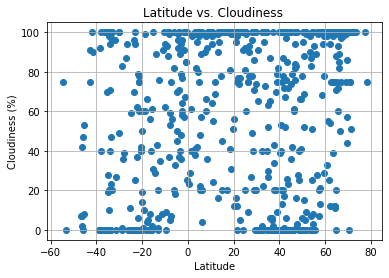

In [12]:
# Build a scatter plot for Latitude vs. Cloudiness 

# Save the data to create the scatter plot in a dictionary
scatter_parms_dict =  { "y_axis"  : clean_city_data["Cloud coverage"]
                      , "ylabel"  : "Cloudiness"
                      , "unit"    : "(%)"
                      , "outfile" : "fig03_Latitude_vs_Cloudiness.png"
}

# Call the function to create the scatter plot
create_scatter_plot(scatter_parms_dict )

## Latitude vs. Wind Speed Plot

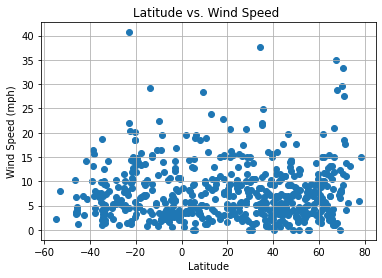

In [13]:
# Build a scatter plot for Latitude vs. Wind speed 

# Save the data to create the scatter plot in a dictionary
scatter_parms_dict =  { "y_axis"  : clean_city_data["Wind speed"]
                      , "ylabel"  : "Wind Speed"
                      , "unit"    : "(mph)"
                      , "outfile" : "fig04_Latitude_vs_WindSpeed.png"
}

# Call the function to create the scatter plot
create_scatter_plot(scatter_parms_dict )

## Linear Regression

In [14]:
# Create a df of cities in Northern Hemisphere 
northern_hemisphere_df = clean_city_data.loc[ (clean_city_data["City latitude"] >= 0 ) 
                                            ]

# Create a df of cities in Southern Hemisphere 
southern_hemisphere_df = clean_city_data.loc[ (clean_city_data["City latitude"] < 0 ) 
                                            ]
print (f"Number of cities in northern_hemisphere: {len(northern_hemisphere_df)}")
print (f"Number of cities in southern_hemisphere: {len(southern_hemisphere_df)}")

Number of cities in northern_hemisphere: 378
Number of cities in southern_hemisphere: 181


In [17]:
# Define a function to create linear regression for a given hemisphere and y_axis vs Latitude 
def create_linear_regression(linear_regression_parms_dict):
    
    # Save the parms value from parms dict
    hemisphere_loc = linear_regression_parms_dict.get("hemisphere_loc")
    x_values       = linear_regression_parms_dict.get("x_values")
    y_values       = linear_regression_parms_dict.get("y_values")
    ylabel         = linear_regression_parms_dict.get("ylabel")
    unit           = linear_regression_parms_dict.get("unit")
    annotatate_x   = linear_regression_parms_dict.get("annotatate_x")  
    annotatate_y   = linear_regression_parms_dict.get("annotatate_y") 
    outfile        = linear_regression_parms_dict.get("outfile")
    
    # Perform a linear regression on y_values vs. x_values
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Compare the calcualted Pearson's r to the plots
    plt.scatter( x_values
               , y_values
               , color="blue")

    # Add the line regresssion to plot
    plt.plot(x_values,regress_values,"r-")

    # Annotate the line equation
    plt.annotate(line_eq,(annotatate_x, annotatate_y),fontsize=10,color="red")

    # Set the title and x & y labels
    xlabel = "Latitude"
    plt.xlabel (f"{xlabel}")
    plt.ylabel (f"{ylabel} {unit}")
    plt.title  (f"{hemisphere_loc} Hemisphere - {ylabel} {unit} vs. {xlabel}")

     # Print r value
    print(f"The r-value is: {rvalue**2}")

    # Save the figure 
    plt.savefig(f"../output_data/{outfile}")

    # Show plot
    plt.show()

###  Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.42216275357259914


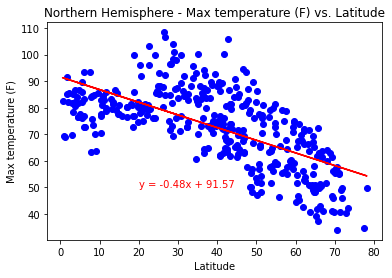

In [18]:
# Calculate the linear regression equation Northern Hemisphere - Temperature (F) vs. Latitude

# Save the data to create the scatter plot in a dictionary
linear_regression_parms_dict = { "hemisphere_loc" : "Northern"
                               , "x_values"       : northern_hemisphere_df["City latitude"]
                               , "y_values"       : northern_hemisphere_df["Max temperature"]
                               , "ylabel"         : "Max temperature"
                               , "unit"           : "(F)"
                               , "annotatate_x"   : 20
                               , "annotatate_y"   : 50
                               , "outfile"        : "fig05_Northern_Max_Temp_vs_Latitude.png"                               
}

# Call the function to create the linear regression
create_linear_regression(linear_regression_parms_dict )

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6248117041543457


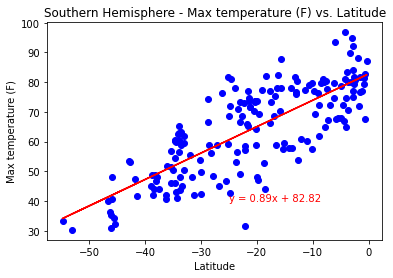

In [19]:
# Calculate the linear regression equation Southern Hemisphere - Max Temp vs. Latitude Linear Regression

# Save the data to create the scatter plot in a dictionary
linear_regression_parms_dict = { "hemisphere_loc" : "Southern"
                               , "x_values"       : southern_hemisphere_df["City latitude"]
                               , "y_values"       : southern_hemisphere_df["Max temperature"]
                               , "ylabel"         : "Max temperature"
                               , "unit"           : "(F)"
                               , "annotatate_x"   : -25
                               , "annotatate_y"   : 40
                               , "outfile"        : "fig06_Southern_Max_Temp_vs_Latitude.png"
                               
}

# Call the function to create the linear regression
create_linear_regression(linear_regression_parms_dict )

### Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 4.099348057970714e-05


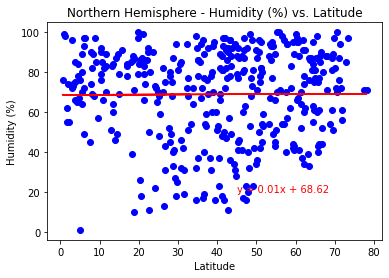

In [20]:
# Calculate the linear regression equation Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

# Save the data to create the scatter plot in a dictionary
linear_regression_parms_dict = { "hemisphere_loc" : "Northern"
                               , "x_values"       : northern_hemisphere_df["City latitude"]
                               , "y_values"       : northern_hemisphere_df["Humidity"]
                               , "ylabel"         : "Humidity"
                               , "unit"           : "(%)"
                               , "annotatate_x"   : 45
                               , "annotatate_y"   : 20
                               , "outfile"        : "fig07_Northern_Humidity_vs_Latitude.png"
                               
}

# Call the function to create the linear regression
create_linear_regression(linear_regression_parms_dict )

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.012385027923732927


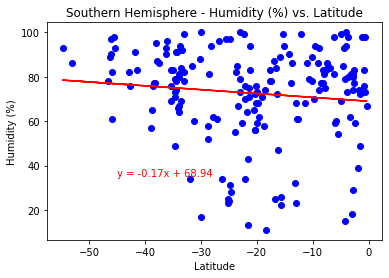

In [21]:
# Calculate the linear regression equation Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

# Save the data to create the scatter plot in a dictionary
linear_regression_parms_dict = { "hemisphere_loc" : "Southern"
                               , "x_values"       : southern_hemisphere_df["City latitude"]
                               , "y_values"       : southern_hemisphere_df["Humidity"]
                               , "ylabel"         : "Humidity"
                               , "unit"           : "(%)"
                               , "annotatate_x"   : -45
                               , "annotatate_y"   : 35
                               , "outfile"        : "fig08_Southern_Humidity_vs_Latitude.png"
                               
}

# Call the function to create the linear regression
create_linear_regression(linear_regression_parms_dict )

### Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 7.72338696715445e-05


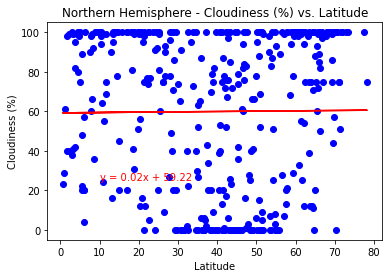

In [22]:
# Calculate the linear regression equation Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

# Save the data to create the scatter plot in a dictionary
linear_regression_parms_dict = { "hemisphere_loc" : "Northern"
                               , "x_values"       : northern_hemisphere_df["City latitude"]
                               , "y_values"       : northern_hemisphere_df["Cloud coverage"]
                               , "ylabel"         : "Cloudiness"
                               , "unit"           : "(%)"
                               , "annotatate_x"   : 10
                               , "annotatate_y"   : 25
                               , "outfile"        : "fig09_Northern_Cloudiness_vs_Latitude.png"
                               
}

# Call the function to create the linear regression
create_linear_regression(linear_regression_parms_dict )

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.031114765208831982


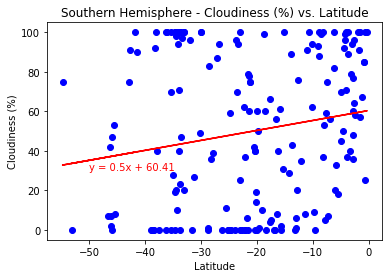

In [23]:
# Calculate the linear regression equation Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

# Save the data to create the scatter plot in a dictionary
linear_regression_parms_dict = { "hemisphere_loc" : "Southern"
                               , "x_values"       : southern_hemisphere_df["City latitude"]
                               , "y_values"       : southern_hemisphere_df["Cloud coverage"]
                               , "ylabel"         : "Cloudiness"
                               , "unit"           : "(%)"
                               , "annotatate_x"   : -50
                               , "annotatate_y"   : 30
                               , "outfile"        : "fig10_Southern_Cloudiness_vs_Latitude.png"
                               
}

# Call the function to create the linear regression
create_linear_regression(linear_regression_parms_dict )

### Wind Speed (m/s) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0005222040469116851


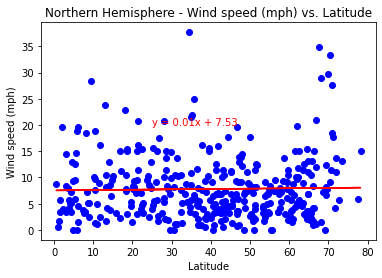

In [24]:
# Calculate the linear regression equation Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

# Save the data to create the scatter plot in a dictionary
linear_regression_parms_dict = { "hemisphere_loc" : "Northern"
                               , "x_values"       : northern_hemisphere_df["City latitude"]
                               , "y_values"       : northern_hemisphere_df["Wind speed"]
                               , "ylabel"         : "Wind speed"
                               , "unit"           : "(mph)"
                               , "annotatate_x"   : 25
                               , "annotatate_y"   : 20
                               , "outfile"        : "fig11_Northern_Wind_Speed_vs_Latitude.png"
                               
}

# Call the function to create the linear regression
create_linear_regression(linear_regression_parms_dict )

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0013689518267156467


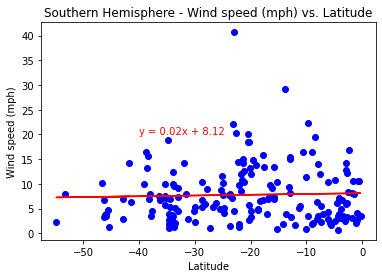

In [25]:
# Calculate the linear regression equation Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

# Save the data to create the scatter plot in a dictionary
linear_regression_parms_dict = { "hemisphere_loc" : "Southern"
                               , "x_values"       : southern_hemisphere_df["City latitude"]
                               , "y_values"       : southern_hemisphere_df["Wind speed"]
                               , "ylabel"         : "Wind speed"
                               , "unit"           : "(mph)"
                               , "annotatate_x"   : -40
                               , "annotatate_y"   : 20
                               , "outfile"        : "fig12_Southern_Wind_Speed_vs_Latitude.png"                              
}

# Call the function to create the linear regression
create_linear_regression(linear_regression_parms_dict )